## I imported the following packages to be used within the dataset.

In [58]:
from IPython.display import display
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()

ModuleNotFoundError: No module named 'google.colab'

## The .csv file was uploaded and converted to a dataframe after removing nulls.

In [59]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [60]:
import io
personalfinance = pd.read_csv(io.BytesIO(uploaded['personalfinance_export2.csv']))

NameError: name 'uploaded' is not defined

In [61]:
finance = pd.read_csv(r"C:\Users\neeth\Downloads\finance.csv")

In [62]:
print(finance.shape)

(100, 10)


In [63]:
finance.head()

,Unnamed: 0,ID,Title,Post Text,Score,Upvotes,Media,Is_Video,Total Comments,Post Date
0,0,zw3k7j,"Moronic Monday - December 27, 2022 - Your Week...",This is your safe place for questions on finan...,6,0.76,NaN,False,10,2022-12-27 02:00:10
1,1,zwk93s,Wall Street’s Big Banks Score $1 Trillion of P...,NaN,740,0.93,NaN,False,122,2022-12-27 16:59:23
2,2,zx01bk,Tesla stock marks lowest close in years as inv...,NaN,13,0.82,NaN,False,15,2022-12-28 04:18:28
3,3,zw017m,U.S. SEC votes to advance stock market overhau...,NaN,738,0.98,NaN,False,104,2022-12-26 23:20:17
4,4,zwxoam,"Is this jacaranda finance website real, im loo...",NaN,0,0.50,NaN,False,2,2022-12-28 02:24:14


In [64]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      100 non-null    int64  
 1   ID              100 non-null    object 
 2   Title           100 non-null    object 
 3   Post Text       11 non-null     object 
 4   Score           100 non-null    int64  
 5   Upvotes         100 non-null    float64
 6   Media           1 non-null      object 
 7   Is_Video        100 non-null    bool   
 8   Total Comments  100 non-null    int64  
 9   Post Date       100 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 7.3+ KB


In [65]:
finance.isna().sum()

Unnamed: 0         0
ID                 0
Title              0
Post Text         89
Score              0
Upvotes            0
Media             99
Is_Video           0
Total Comments     0
Post Date          0
dtype: int64

In [67]:
finance.Is_Video.value_counts()

False    99
True      1
Name: Is_Video, dtype: int64

In [68]:
new_df = finance.copy()
print(new_df.shape)

(100, 10)


## Title/weekly thread posts were removed as these were treated as outliers.

In [69]:
new_df = new_df[new_df["Title"].str.contains("Thread") == False]
print(new_df.shape)

(89, 10)


In [70]:
new_df = new_df[new_df["Title"].str.contains("Read this first") == False]
print(new_df.shape)

(89, 10)


In [71]:
display(new_df)

,Unnamed: 0,ID,Title,Post Text,Score,Upvotes,Media,Is_Video,Total Comments,Post Date
1,1,zwk93s,Wall Street’s Big Banks Score $1 Trillion of P...,NaN,740,0.93,NaN,False,122,2022-12-27 16:59:23
2,2,zx01bk,Tesla stock marks lowest close in years as inv...,NaN,13,0.82,NaN,False,15,2022-12-28 04:18:28
3,3,zw017m,U.S. SEC votes to advance stock market overhau...,NaN,738,0.98,NaN,False,104,2022-12-26 23:20:17
4,4,zwxoam,"Is this jacaranda finance website real, im loo...",NaN,0,0.50,NaN,False,2,2022-12-28 02:24:14
5,5,zwy59d,marketGOATS' Players Out-Perform S&P 500 Index...,NaN,0,0.25,NaN,False,0,2022-12-28 02:46:27
...,...,...,...,...,...,...,...,...,...,...
95,95,y4habi,Bostic acknowledges accidental trading that vi...,NaN,6,1.00,NaN,False,6,2022-10-15 07:15:09
96,96,y3usnb,The Pool,NaN,16,0.70,NaN,False,8,2022-10-14 14:01:42
97,97,y2bd70,Fed officials expect higher rates to stay in p...,NaN,987,0.97,NaN,False,147,2022-10-12 18:23:28
98,98,y1ohjo,'Get this done!' BoE's Bailey gives UK funds 3...,NaN,358,0.97,NaN,False,66,2022-10-11 23:59:56


## Upon examining the dataset, I noticed that initially, the **created** column was in Unix timestamp format (int64). It was converted to a datetime format instead.

In [72]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      89 non-null     int64  
 1   ID              89 non-null     object 
 2   Title           89 non-null     object 
 3   Post Text       0 non-null      object 
 4   Score           89 non-null     int64  
 5   Upvotes         89 non-null     float64
 6   Media           1 non-null      object 
 7   Is_Video        89 non-null     bool   
 8   Total Comments  89 non-null     int64  
 9   Post Date       89 non-null     object 
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 7.0+ KB


In [73]:
new_df['Post Date']=(pd.to_datetime(new_df['Post Date'],unit='ns'))

## For EDA purposes, the ID column was removed.

In [74]:
new_df.drop(columns=['ID'], inplace=True)

## An initial word cloud was created from the **title** column to see which words are present. Afterwards, some cleaning was performed to compare results.

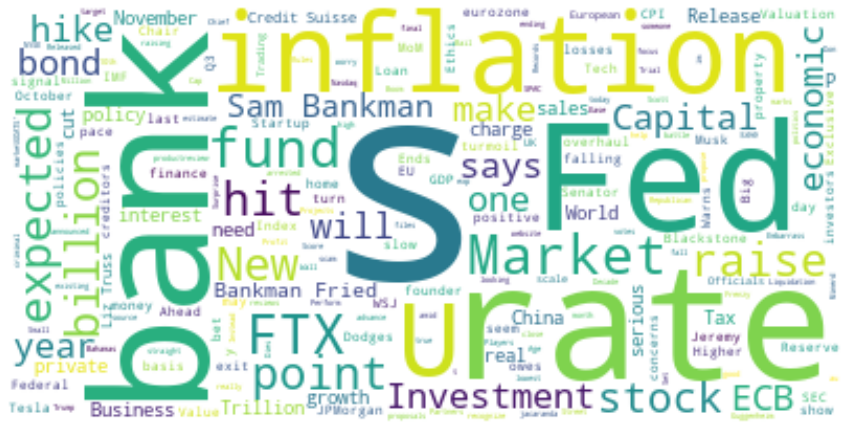

In [75]:
text = " ".join(i for i in new_df.Title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
print(text)

Wall Street’s Big Banks Score $1 Trillion of Profit in a Decade Tesla stock marks lowest close in years as investors worry about Musk’s focus | Tesla U.S. SEC votes to advance stock market overhaul proposals Is this jacaranda finance website real, im looking at the reviews on productreview.com.au and they all seem really positive, it seems to good to be true, can someone help me recognize if its a scam or not? marketGOATS' Players Out-Perform S&P 500 Index by up to 30 Points Don’t Embarrass Trump Over Tax Records Release—Charge Him Instead SPAC Boom Ends in Frenzy of Liquidation - WSJ A Small-Cap Surprise Sam Bankman-Fried Released on $250 Million Bail Ahead of FTX Trial Scott Minerd, Guggenheim Partners’ Investment Chief, Dies at Age 63 GDP Q3 final estimate 3.2%, exp. 2.9%, last 2.9% Republican senators propose overhaul of Federal Reserve amid concerns about politics U.S. existing home sales fall for 10th straight month in November ECB raises eurozone interest rate by 0.5% The Fed an

## Punctuation was removed and a dataframe containing only the relevant words (i.e. stop words removed) was created.

In [77]:
test_str = text.translate(str.maketrans('', '', string.punctuation))
print(test_str)

Wall Street’s Big Banks Score 1 Trillion of Profit in a Decade Tesla stock marks lowest close in years as investors worry about Musk’s focus  Tesla US SEC votes to advance stock market overhaul proposals Is this jacaranda finance website real im looking at the reviews on productreviewcomau and they all seem really positive it seems to good to be true can someone help me recognize if its a scam or not marketGOATS Players OutPerform SP 500 Index by up to 30 Points Don’t Embarrass Trump Over Tax Records Release—Charge Him Instead SPAC Boom Ends in Frenzy of Liquidation  WSJ A SmallCap Surprise Sam BankmanFried Released on 250 Million Bail Ahead of FTX Trial Scott Minerd Guggenheim Partners’ Investment Chief Dies at Age 63 GDP Q3 final estimate 32 exp 29 last 29 Republican senators propose overhaul of Federal Reserve amid concerns about politics US existing home sales fall for 10th straight month in November ECB raises eurozone interest rate by 05 The Fed announced a 50basispoint rate hike

In [78]:
test_li = test_str.split(" ")
print(test_li)

['Wall', 'Street’s', 'Big', 'Banks', 'Score', '1', 'Trillion', 'of', 'Profit', 'in', 'a', 'Decade', 'Tesla', 'stock', 'marks', 'lowest', 'close', 'in', 'years', 'as', 'investors', 'worry', 'about', 'Musk’s', 'focus', '', 'Tesla', 'US', 'SEC', 'votes', 'to', 'advance', 'stock', 'market', 'overhaul', 'proposals', 'Is', 'this', 'jacaranda', 'finance', 'website', 'real', 'im', 'looking', 'at', 'the', 'reviews', 'on', 'productreviewcomau', 'and', 'they', 'all', 'seem', 'really', 'positive', 'it', 'seems', 'to', 'good', 'to', 'be', 'true', 'can', 'someone', 'help', 'me', 'recognize', 'if', 'its', 'a', 'scam', 'or', 'not', 'marketGOATS', 'Players', 'OutPerform', 'SP', '500', 'Index', 'by', 'up', 'to', '30', 'Points', 'Don’t', 'Embarrass', 'Trump', 'Over', 'Tax', 'Records', 'Release—Charge', 'Him', 'Instead', 'SPAC', 'Boom', 'Ends', 'in', 'Frenzy', 'of', 'Liquidation', '', 'WSJ', 'A', 'SmallCap', 'Surprise', 'Sam', 'BankmanFried', 'Released', 'on', '250', 'Million', 'Bail', 'Ahead', 'of', 'FTX

In [79]:
title_df = pd.DataFrame(test_li, columns = ['words'])
print(title_df)

           words
0           Wall
1       Street’s
2            Big
3          Banks
4          Score
...          ...
1035      across
1036  developing
1037   countries
1038            
1039        UNDP

[1040 rows x 1 columns]


In [80]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
stop_words = set(stopwords.words('english'))

print(stop_words)

{"you've", 'again', 'because', 'of', "that'll", 'while', 'any', 'don', 'ourselves', "shan't", 'does', 'they', 'hers', 'them', 'hasn', 'who', 'be', 'her', 'their', 'further', 'both', 'having', 'yours', 'nor', 'wouldn', 'doing', 'll', "doesn't", 'theirs', 'more', 'o', 'y', 'i', 'your', 'this', "couldn't", "hasn't", 'yourself', 'during', 'same', 'couldn', "you're", 're', "wasn't", 'so', 'when', "don't", 'no', 'the', 'being', "wouldn't", 'herself', 'on', 'under', 'itself', 'where', 'why', 'only', 'myself', 'most', 'before', 'that', 'about', 'how', 'shan', 'wasn', 'what', 'at', 'now', 'and', 'above', 'isn', 'can', 'then', 'in', 'each', 'which', 'an', 'ma', 'my', 'our', 'won', 'those', 'mustn', 'these', 'if', 'other', 'too', 'as', "aren't", 'its', "shouldn't", 't', 'is', 'hadn', 'did', 'all', 'you', 'shouldn', 'me', 'his', 'was', 'but', "weren't", "you'll", "mightn't", 'haven', 'themselves', "isn't", 'through', 'aren', 'been', "hadn't", "needn't", 'him', 'should', 'will', 'to', "didn't", 'sh

In [82]:
title_df = title_df.dropna()
title_df['words'].replace(' ', np.nan, inplace=True)
title_df['words'] = title_df['words'].str.lower()
display(title_df)

,words
0,wall
1,street’s
2,big
3,banks
4,score
...,...
1035,across
1036,developing
1037,countries
1038,


In [83]:
 title_df['words'] = title_df['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
 title_df['words'].replace('', np.nan, inplace=True)
 title_df = title_df.dropna()
 display(title_df)

,words
0,wall
1,street’s
2,big
3,banks
4,score
...,...
1034,unfolding
1035,across
1036,developing
1037,countries


## Another word cloud was created to compare. There are few noticeable differences with the original word cloud. Interestingly, most of the post titles in this subreddit pertained to US-specific personal finance concerns.

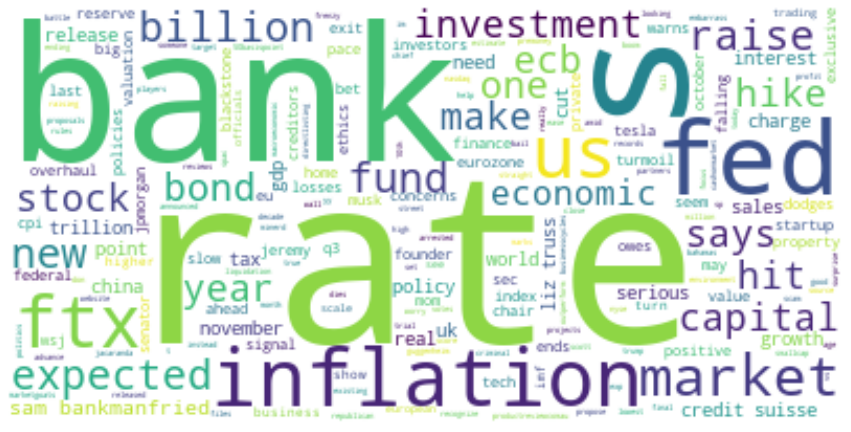

In [84]:
title_text = " ".join(i for i in title_df.words)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(title_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Frequencies of each word were quantified.

In [85]:
title_count = pd.DataFrame(title_df['words'].value_counts())
title_count.columns = ['words']
display(title_count)

,words
inflation,9
fed,9
rates,8
us,7
banks,6
...,...
bis,1
curb,1
efforts,1
undermine,1


In [86]:
new_df['created date'] = new_df['Post Date'].dt.date
new_df['created hour'] = new_df['Post Date'].dt.hour
display(new_df)

,Unnamed: 0,Title,Post Text,Score,Upvotes,Media,Is_Video,Total Comments,Post Date,created date,created hour
1,1,Wall Street’s Big Banks Score $1 Trillion of P...,NaN,740,0.93,NaN,False,122,2022-12-27 16:59:23,2022-12-27,16
2,2,Tesla stock marks lowest close in years as inv...,NaN,13,0.82,NaN,False,15,2022-12-28 04:18:28,2022-12-28,4
3,3,U.S. SEC votes to advance stock market overhau...,NaN,738,0.98,NaN,False,104,2022-12-26 23:20:17,2022-12-26,23
4,4,"Is this jacaranda finance website real, im loo...",NaN,0,0.50,NaN,False,2,2022-12-28 02:24:14,2022-12-28,2
5,5,marketGOATS' Players Out-Perform S&P 500 Index...,NaN,0,0.25,NaN,False,0,2022-12-28 02:46:27,2022-12-28,2
...,...,...,...,...,...,...,...,...,...,...,...
95,95,Bostic acknowledges accidental trading that vi...,NaN,6,1.00,NaN,False,6,2022-10-15 07:15:09,2022-10-15,7
96,96,The Pool,NaN,16,0.70,NaN,False,8,2022-10-14 14:01:42,2022-10-14,14
97,97,Fed officials expect higher rates to stay in p...,NaN,987,0.97,NaN,False,147,2022-10-12 18:23:28,2022-10-12,18
98,98,'Get this done!' BoE's Bailey gives UK funds 3...,NaN,358,0.97,NaN,False,66,2022-10-11 23:59:56,2022-10-11,23


In [87]:
post_hour_count = pd.DataFrame(new_df['created hour'].value_counts())
display(post_hour_count)

,created hour
11,9
15,8
13,8
23,6
19,6
18,6
2,5
14,5
5,4
22,4


(array([ 9.,  6.,  6.,  1., 12., 10., 16.,  9.,  8., 12.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

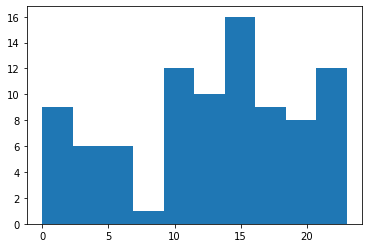

In [88]:
plt.hist(new_df['created hour'])

<AxesSubplot:xlabel='created hour', ylabel='Count'>

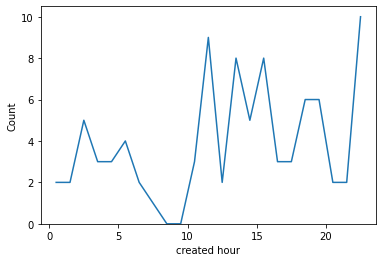

In [89]:
import seaborn as sb

sb.histplot(new_df['created hour'], element = 'poly', fill = False, bins = 24, binwidth = 1)

In [90]:
score_count = pd.DataFrame(new_df['Upvotes'].value_counts())
display(score_count)

,Upvotes
0.97,21
0.98,8
0.96,8
0.95,7
0.92,7
0.93,6
0.94,5
1.00,3
0.87,3
0.99,2


<AxesSubplot:xlabel='Upvotes', ylabel='Count'>

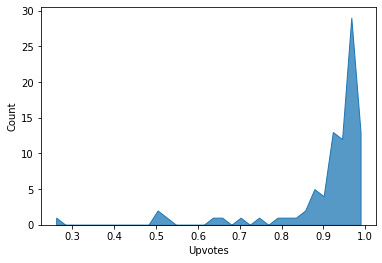

In [91]:
sb.histplot(new_df['Upvotes'], element = 'poly', fill = True)

In [92]:
score_count = pd.DataFrame(new_df['Score'].value_counts())
display(score_count)

,Score
0,2
1,2
110,2
740,1
334,1
...,...
1432,1
511,1
986,1
510,1


<AxesSubplot:xlabel='Score', ylabel='Count'>

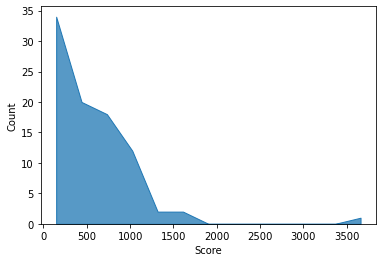

In [93]:
sb.histplot(new_df['Score'], element = 'poly', fill = True)

In [56]:
comment_count = pd.DataFrame(new_df['Total Comments'].value_counts())
display(comment_count)

,Total Comments
2,5
6,3
15,3
46,2
101,2
...,...
90,1
89,1
144,1
252,1


<AxesSubplot:xlabel='Total Comments', ylabel='Count'>

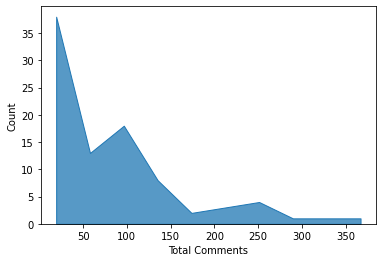

In [57]:
sb.histplot(new_df['Total Comments'], element = 'poly', fill = True)